# Tutorial #1 Basics

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Worlds

In [38]:
import numpy as np
from matplotlib import pyplot as plt

from environments.gridworlds.gridworlds_classic import *
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer

from agents.pgp.pgp_softmax import SoftMaxPGP
from utils.policy_functions import *
from plots.agent_plotter import AgentPlotter

np.set_printoptions(precision=2)

Create a simple grid world visualize it

This is a grid-world with 130 states and 4 actions
The initial positions are: [[1, 1], [1, 11]]. The rewards are at: [[8, 6]]


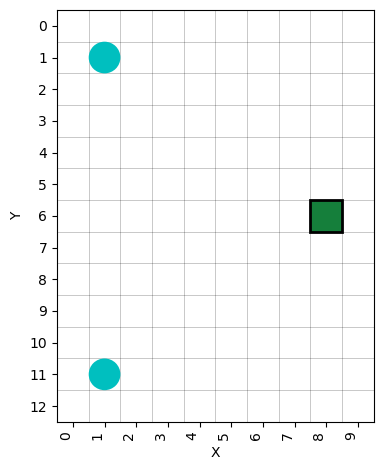

In [39]:
world = TwoStartsRoom()
viz = GridWorldVisualizer(world)

# use world.decode() and encode() to switch from state IDs to state positions and viceversa
pp_start = world.decode(world.states_start) 
pp_rew = world.decode(world.states_terminal) 

print("This is a grid-world with {} states and {} actions".format(world.n_state, world.n_action))
print("The initial positions are: {}. The rewards are at: {}".format(pp_start.tolist(), pp_rew.tolist()))
viz.plot_maze(plot_axis=True)
plt.tight_layout()

In [40]:
s_p78 = world.encode([7, 8])
r_snippet = world.R[s_p78, :, -25:-15].T

print("the rewards matrix has shape [states * actions * states].")
print("world.rewards.shape = {}".format(world.R.shape))
print("world.rewards gives us the rewards obtained for going from s1 to s2 through action a")
print("")
print("e.g. R(s1=[7,8], a, s2) = ")
print("...")
print(r_snippet)
print("...")


the rewards matrix has shape [states * actions * states].
world.rewards.shape = (130, 4, 130)
world.rewards gives us the rewards obtained for going from s1 to s2 through action a

e.g. R(s1=[7,8], a, s2) = 
...
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
...


In [41]:
ss_snippet = world.P[s_p78, :, -25:-15].T

print("the next_states matrix has shape [states * actions * states].")
print("world.next_states.shape = {}".format(world.P.shape))
print("world.next_states gives us the probability of reaching s2 from s1 when applying action a")
print("")
print("e.g. P(s2 | s1=[7,8], a) = ")
print("...")
print(ss_snippet)
print("...")


the next_states matrix has shape [states * actions * states].
world.next_states.shape = (130, 4, 130)
world.next_states gives us the probability of reaching s2 from s1 when applying action a

e.g. P(s2 | s1=[7,8], a) = 
...
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
...


### Agents

Now let's create a GPP agent.
Let's make it roam in the grid world and plot the trajectory.

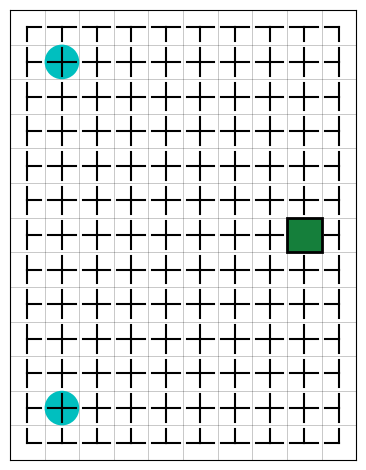

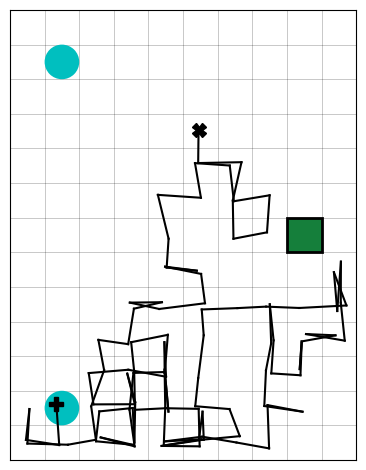

In [42]:
agent = SoftMaxPGP(world, gamma=0.95, p0_func=p0_onehot)
viz.agent = agent

viz.plot_policy(plot_axis=False)
plt.tight_layout()
plt.show()

viz.plot_trajectory(n_steps=100, greedy=False, plot_axis=False)
plt.tight_layout()
plt.show()

# trajectories can also be generated using the agent method agent.trajectory()
# states, actions, rewards, done = agent.trajectory(n_steps=100, greedy=False)

Let's look at the agent's internal representation of policy π, transition matrix T and successor matrix SR

In [43]:
π = agent.policy_vec()
print("agent.policy_vec() gives the [n_state * n_action] policy matrix, representing the distribution p(a|s)")
print("agent.policy_vec().shape = {}".format(π.shape))
print("")
print("e.g. p(a|s) = ")
print("...")
print(π[:10, :])
print("...")

agent.policy_vec() gives the [n_state * n_action] policy matrix, representing the distribution p(a|s)
agent.policy_vec().shape = (130, 4)

e.g. p(a|s) = 
...
[[0.   0.5  0.5  0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]
 [0.33 0.33 0.33 0.  ]]
...


In [44]:
T = agent.T
print("agent.T gives the [n_state * n_state] T matrix, representing the distribution p(s2|s1)")
print("agent.T.shape = {}".format(T.shape))
print("")
print("e.g. p(s2 | s1 = [7,8]) = ")
print("...")
print(T[s_p78, :])
print("...")

agent.T gives the [n_state * n_state] T matrix, representing the distribution p(s2|s1)
agent.T.shape = (130, 130)

e.g. p(s2 | s1 = [7,8]) = 
...
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]
...


agent.SR returns the [n_state * n_state] successor matrix, i.e. the state counters η_s0(s) given an inition position s0
agent.SR.shape = (130, 130)

e.g. η_[3,3](s) = 


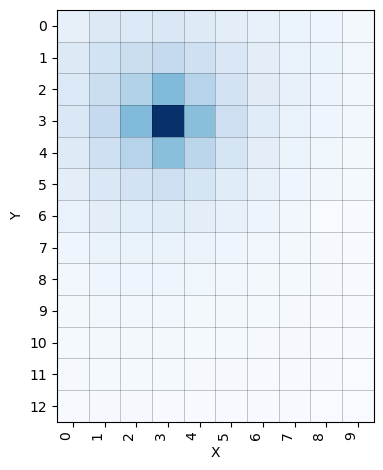

In [45]:
s_p33 = world.encode([3, 3])

SR = agent.SR
SR[:, world.states_terminal] = 0

print("agent.SR returns the [n_state * n_state] successor matrix, i.e. the state counters η_s0(s) given an inition position s0")
print("agent.SR.shape = {}".format(SR.shape))
print("")
print("e.g. η_[3,3](s) = ")
viz.plot_grid(SR[s_p33, :])
plt.tight_layout()

Let's visualize the value function V(S) for the uniform policy π_uni for all state positions


V_π0(s) = 


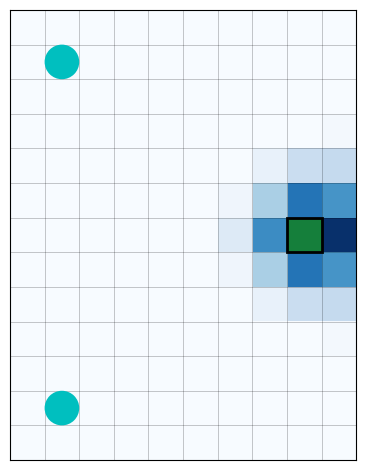

In [46]:
print("")
print("V_π0(s) = ")
viz.plot_grid(agent.V, plot_axis=False)
viz.plot_maze(plot_axis=False)
plt.tight_layout()

Keep in mind that the reward state [8, 8] is also a terminal state.

This is why it's value is equal to 0: no more transitions can be done once this state is reached.

### Learning

We can compute and visualize the gradient of the value function V(s) as follows:

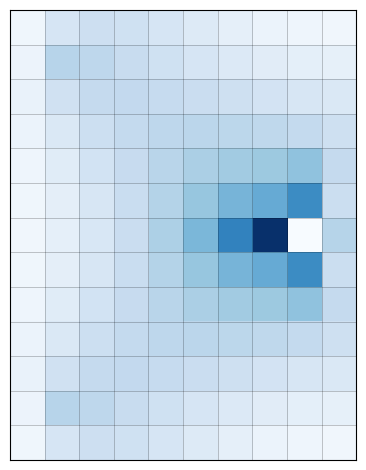

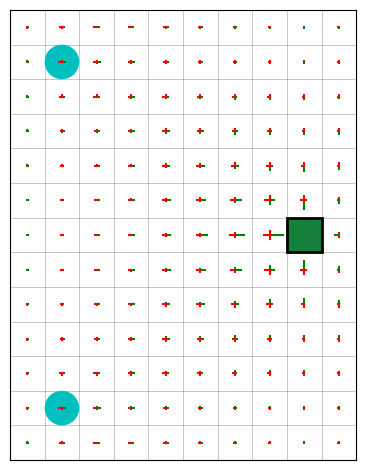

In [47]:
agent.reset()

dV = agent.gradient()
viz.plot_gradient_norm(grad=dV, plot_axis=False)
plt.tight_layout()
plt.show()

viz.plot_gradient(factor=1, plot_axis=False)
plt.tight_layout()
plt.show()

Now let's train our agent.

In [48]:
agent.reset()

# Training parameters
n_steps=1000
alpha=0.05

# Training
agent.learn(n_steps=n_steps, alpha=alpha)

100%|██████████| 1000/1000 [00:01<00:00, 541.12it/s]


We can plot the policy π = p(a|s) using the GridWorldVisualizer.

In this plot each probability p(a|s) is represented by a vector in square [s] with the direction [a].

The norm of the vector is proportional to p(a|s).

The dashed line represents the greedy trajectory of π.

Learned Policy π:
[[0.00e+00 5.43e-01 4.57e-01 0.00e+00]
 [1.59e-01 5.90e-01 2.51e-01 0.00e+00]
 [1.99e-01 5.40e-01 2.61e-01 0.00e+00]
 [2.50e-01 4.66e-01 2.84e-01 0.00e+00]
 [2.83e-01 4.17e-01 3.01e-01 0.00e+00]
 [3.00e-01 3.92e-01 3.08e-01 0.00e+00]
 [3.07e-01 3.86e-01 3.07e-01 0.00e+00]
 [3.08e-01 3.92e-01 3.00e-01 0.00e+00]
 [3.01e-01 4.17e-01 2.83e-01 0.00e+00]
 [2.84e-01 4.66e-01 2.50e-01 0.00e+00]
 [2.61e-01 5.40e-01 1.99e-01 0.00e+00]
 [2.51e-01 5.90e-01 1.59e-01 0.00e+00]
 [4.57e-01 5.43e-01 0.00e+00 0.00e+00]
 [0.00e+00 4.22e-01 4.45e-01 1.33e-01]
 [2.84e-05 1.00e+00 2.46e-04 2.62e-05]
 [2.31e-02 9.21e-01 3.98e-02 1.63e-02]
 [1.15e-01 6.62e-01 1.39e-01 8.39e-02]
 [1.82e-01 4.80e-01 1.97e-01 1.42e-01]
 [2.09e-01 3.99e-01 2.18e-01 1.74e-01]
 [2.18e-01 3.80e-01 2.18e-01 1.84e-01]
 [2.18e-01 3.99e-01 2.09e-01 1.74e-01]
 [1.97e-01 4.80e-01 1.82e-01 1.42e-01]
 [1.39e-01 6.62e-01 1.15e-01 8.39e-02]
 [3.98e-02 9.21e-01 2.31e-02 1.63e-02]
 [2.46e-04 1.00e+00 2.84e-05 2.62e-05]
 [4.45e

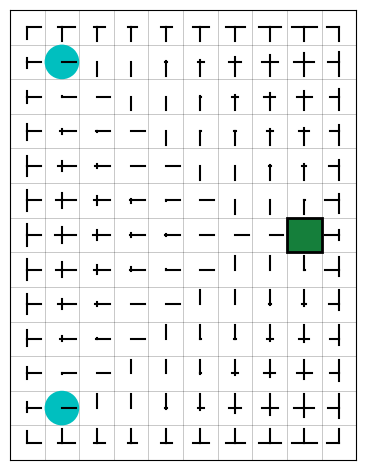

In [49]:
print("Learned Policy π:")
print(agent.policy_vec())

viz.plot_policy(plot_axis=False)
plt.tight_layout()

GridWorldVisualizer.plot_trajectory_distribution() shows the expected trajectory of policy π.

The color saturation at each square [s] is proportional to the probability of passing through [s].

The color hue (wavelength) indicates the median timestep at which the square is reached (blue=early, purple=late).

Expected Trajectory with Policy π:


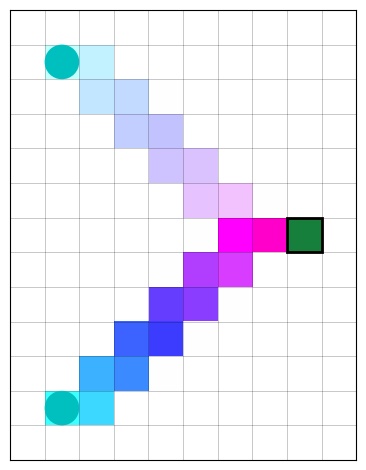

In [50]:
print("Expected Trajectory with Policy π:")
viz.plot_trajectory_distribution(plot_axis=False)
plt.tight_layout()


V_π(s) = 


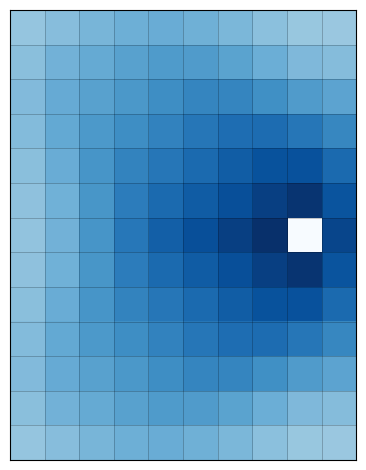

In [51]:
print("")
print("V_π(s) = ")
viz.plot_grid(agent.V, plot_axis=False)
plt.tight_layout()

### Analysis

AgentPlotter is used to visualize the evolution of policies in terms of value function, KL divergence and counter difference:

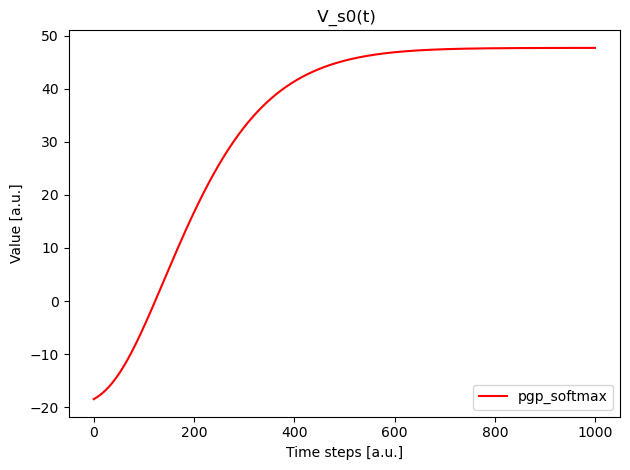

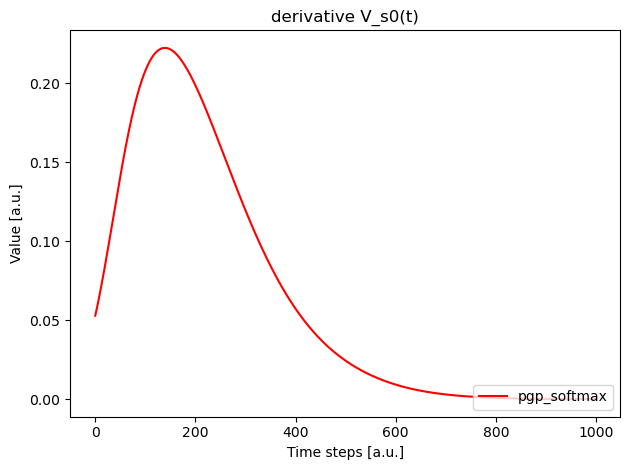

In [52]:
plotter = AgentPlotter(agents=agent)

plotter.plotValue()
plt.tight_layout()
plt.show()

plotter.plotValue(derivative=True)
plt.tight_layout()
plt.show()


In [53]:
states = [world.states_start[0], s_p33, s_p78, world.states_terminal[0]]
states_labels = ["start", "<3,3>", "<7,8>", "end"]
plotter.set_states(states, state_labels=states_labels)

/home/fran-tr/Workspace/gpp_core/utils/policy_tools.py:32: RuntimeWarning: invalid value encountered in divide
  divergences = divergences / np.max(np.abs(divergences), axis=0)


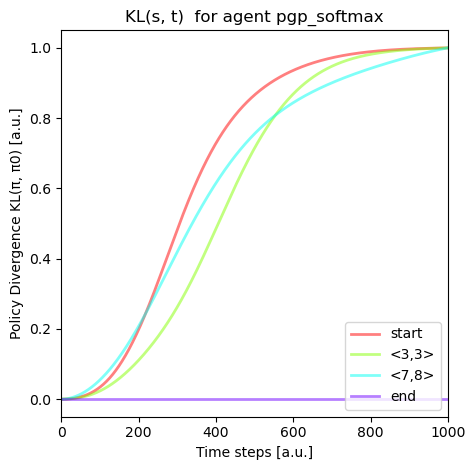

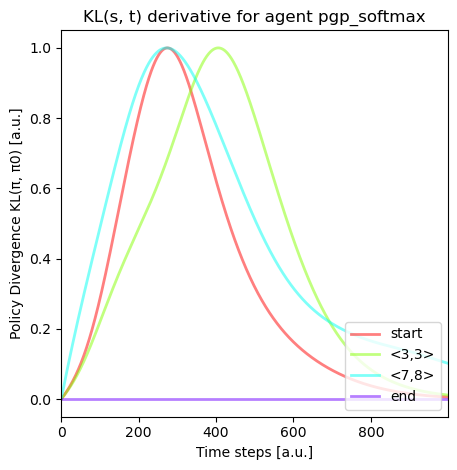

In [54]:
plotter.plotKLDivergence(agent)
plt.tight_layout()
plt.show()

plotter.plotKLDivergence(agent, derivative=True)
plt.tight_layout()
plt.show()


/home/fran-tr/Workspace/gpp_core/utils/policy_tools.py:53: RuntimeWarning: invalid value encountered in divide
  counter_differences = counter_differences / np.max(np.abs(counter_differences), axis=0)


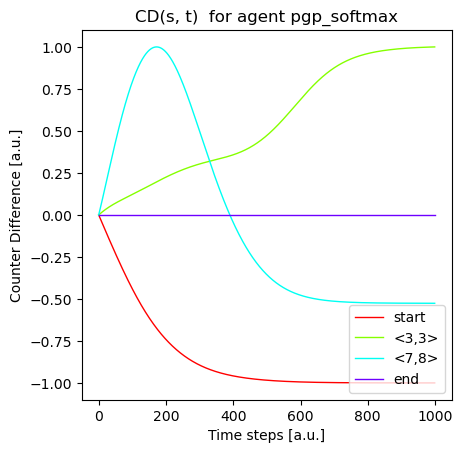

In [55]:
plotter.plotCounterDifference(agent)

The agent can plot the history of all these variables across training epochs and compare across different agents: 

In [56]:
agent1 = SoftMaxPGP(world, gamma=0.90, name="pgp .90")
agent2 = SoftMaxPGP(world, gamma=0.99, name="pgp .99")

# Training 1st round
alpha_1st = 0.05
n_steps_1st = 100
print("1st round...")
agent1.learn(n_steps=n_steps_1st, alpha=alpha_1st)
agent2.learn(n_steps=n_steps_1st, alpha=alpha_1st)

# Training 2nd round
alpha_2nd = 0.02
n_steps_2nd = 500
print("2nd round...")
agent1.learn(n_steps=n_steps_2nd, alpha=alpha_2nd)
agent2.learn(n_steps=n_steps_2nd, alpha=alpha_2nd)

# Training 3nd round
alpha_3rd = 0.01
n_steps_3rd = 500
print("3rd round...")
agent1.learn(n_steps=n_steps_3rd, alpha=alpha_3rd)
agent2.learn(n_steps=n_steps_3rd, alpha=alpha_3rd)

1st round...


100%|██████████| 100/100 [00:00<00:00, 452.46it/s]


2nd round...


100%|██████████| 500/500 [00:00<00:00, 558.85it/s]


3rd round...


100%|██████████| 500/500 [00:00<00:00, 520.21it/s]


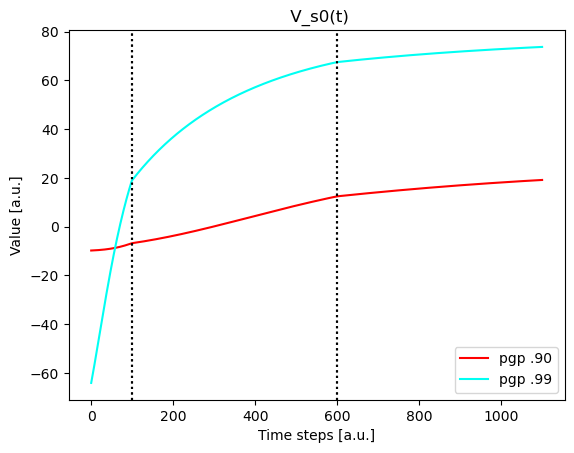

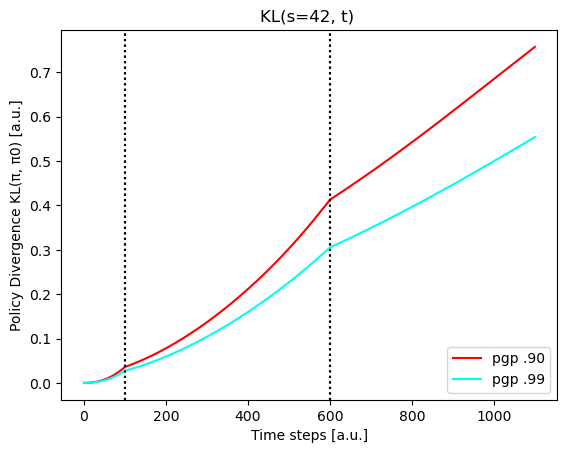

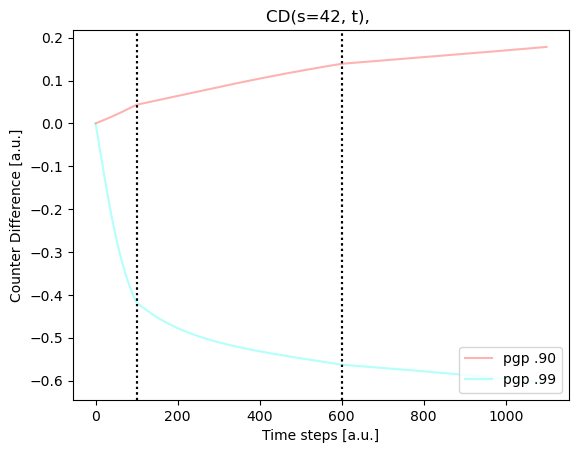

In [57]:
plotter.set_agents([agent1, agent2])

plotter.plotValue()
plt.show()

plotter.plotKLDivergenceState(s_p33)
plt.show()

plotter.plotCounterDifferenceState(s_p33)
plt.show()

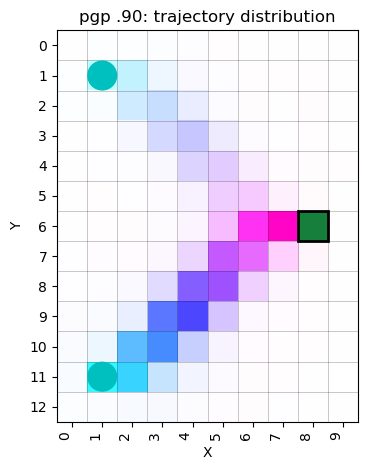

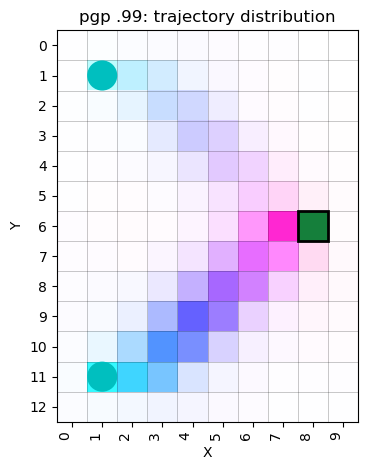

In [58]:
viz1 = GridWorldVisualizer(world, agent1)
viz2 = GridWorldVisualizer(world, agent2)

viz1.plot_trajectory_distribution()
plt.title("{}: trajectory distribution".format(agent1.name))
plt.tight_layout()
plt.show()

viz2.plot_trajectory_distribution()
plt.title("{}: trajectory distribution".format(agent2.name))
plt.tight_layout()
plt.show()